In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Problems
***In times like today, the development of social media is very rapidly and had an impact on an existing business. When word of mouth is carried out by netizens on a business product, it will have a good impact and a bad impact. If the good impact is received, it will make profits for the business company, but if the bad impact is carried out by certain individuals such as for example hate speech on the product, badmouthing the product, insulting the product it will harmful the business company,  Therefore it is necessary to have a machine that can assist in filtering negative sentiments that entering our business products.***

## Goals
***Can provide a solution to the problem above by making a machine that can predict a sentence that has a negative or positive connotation, to prevent negative sentences that have an impact on our product business.***

## Data Source
    Thanks to all the sources who have given permission to use the data by publishing it on the website.
    
    The Source all as follows:
    1. https://repo.telematika.org/project/louisowen6_nlp_bahasa_resources/
    2. https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text?select=data.csv
    3. https://rizalespe.github.io/Dataset-Sentimen-Analisis-Bahasa-Indonesia/
 

In [4]:
df = pd.read_csv('ml_sentiment_analysis.csv')
df = df.drop(columns='Unnamed: 0')
df

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final,length_words
0,inkonsisten,-1,inkonsisten,['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],inkonsisten,inkonsisten,['inkonsisten'],['inkonsisten'],inkonsisten,1
1,porno,-1,porno,['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],porno,porno,['porno'],['porno'],porno,1
2,teroris,-1,teroris,['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],teroris,teroris,['teroris'],['teroris'],teroris,1
3,sesat,-1,sesat,['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],sesat,sesat,['sesat'],['sesat'],sesat,1
4,tuntut,-1,tuntut,['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],tuntut,tuntut,['tuntut'],['tuntut'],tuntut,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",1,"kali saja bpk @aniesbaswedan @sandiuno lihat, ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...",kali bapak aniesbaswedan sandiuno lihat rspun ...,kali bapak aniesbaswedan sandiuno lihat rspun ...,"['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'aniesbaswedan', 'sandiuno', 'lihat',...",kali aniesbaswedan sandiuno lihat rspun swafot...,12
17333,Kita harus dapat merangkul semua orang tanpa b...,1,kita harus dapat merangkul semua orang tanpa b...,"['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...",merangkul orang batas usia kelamin oke oce oke...,rangkul orang batas usia kelamin oke oce oke h...,"['rangkul', 'orang', 'batas', 'usia', 'kelamin...","['rangkul', 'orang', 'batas', 'usia', 'kelamin...",rangkul orang batas usia kelamin oke oce oke h...,16
17334,Ini jagoanku dibidang digital <Smiling Face Wi...,1,ini jagoanku dibidang digital <smiling face wi...,"['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...",jagoanku dibidang digital smiling face dengan ...,jago bidang digital smiling face dengan sungla...,"['jago', 'bidang', 'digital', 'smiling', 'face...","['jago', 'bidang', 'digital', 'smiling', 'face...",jago bidang digital smiling face sunglasses ok...,11
17335,#PesanBijak #OkeOce #GubernurGu3 ...,1,#pesanbijak #okeoce #gubernurgu3 ...,"['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['pesanbijak', 'okeoce', 'gubernurgu3', '...']","['pesanbijak', 'okeoce', 'gubernurgu3']","['pesanbijak', 'oke oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3,pesanbijak oke oce gubernurgu3,"['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3,4


### **In this Notebook, I focused on the machine can predict less at False Negative (Actual Negative Sentiment, but machine detect as a Positive Sentiment) to handling a bad sentiment shown as positive sentiment, so I focused on recall at evaluation matrix.**

In [5]:
df['sentiment'] = df['sentiment'].replace({1:0, -1:1})
# 1 for negative sentiment
# 0 for positive sentiment

In [6]:
df['sentiment'].value_counts()

1    9897
0    7440
Name: sentiment, dtype: int64

In [7]:
X = df['final']
y = df['sentiment']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [9]:
# Evaluation Matrix Function
def Eva_Matrix1(Model, X_train, y_train, X_test, y_test, Name):
    y_pred_train = Model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    y_pred_test = Model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_train, y_pred_train)
    data = {
        f"Training {Name}" : [acc_train, rec_train, prec_train, f1_train],
        f"Test {Name}" : [acc_test, rec_test, prec_test, f1_test]
    }
    df = pd.DataFrame(data=data, index=['Accuracy', 'Recall', 'Precision', 'F1'])
    return df

## Training Model (Pipeline)

### ---------------------------------------------------------------------------------------------------------

## Base Model (CountVectorizer & TfidfVectorizer)

### Logistic Regression (CountVectorizer)

In [10]:
pipe_LR_CV = Pipeline([
    ("prep", CountVectorizer(ngram_range=(1,2))),
    ("algo", LogisticRegression())
])

In [11]:
pipe_LR_CV.fit(X_train, y_train)

Pipeline(steps=[('prep', CountVectorizer(ngram_range=(1, 2))),
                ('algo', LogisticRegression())])

In [12]:
y_base_LR_CV = pipe_LR_CV.predict(X_test)

In [13]:
df_base_LR_CV = Eva_Matrix1(pipe_LR_CV, X_train, y_train, X_test, y_test, "Pipeline LR CV")
df_base_LR_CV

,Training Pipeline LR CV,Test Pipeline LR CV
Accuracy,0.960704,0.832757
Recall,0.996842,0.906566
Precision,0.938184,0.819635
F1,0.966624,0.966624


              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1488
           1       0.82      0.91      0.86      1980

    accuracy                           0.83      3468
   macro avg       0.84      0.82      0.83      3468
weighted avg       0.83      0.83      0.83      3468



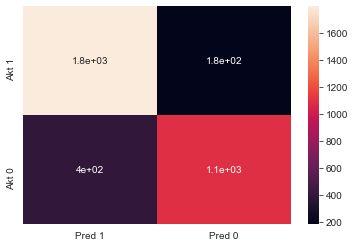

In [14]:
print(classification_report(y_test, y_base_LR_CV))
cm_LR_CV_test = confusion_matrix(y_test, y_base_LR_CV, labels = [1,0])
df_LR_CV_test = pd.DataFrame(data=cm_LR_CV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_CV_test, annot=True)
plt.show()

### Logistic Regression (TfidfVectorizer)

In [15]:
pipe_LR_TV = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", LogisticRegression())
])

In [16]:
pipe_LR_TV.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo', LogisticRegression())])

In [17]:
y_base_LR_TV = pipe_LR_TV.predict(X_test)

In [18]:
df_base_LR_TV = Eva_Matrix1(pipe_LR_CV, X_train, y_train, X_test, y_test, "Pipeline LR TV")
df_base_LR_TV

,Training Pipeline LR TV,Test Pipeline LR TV
Accuracy,0.960704,0.832757
Recall,0.996842,0.906566
Precision,0.938184,0.819635
F1,0.966624,0.966624


              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1488
           1       0.82      0.90      0.86      1980

    accuracy                           0.83      3468
   macro avg       0.84      0.82      0.82      3468
weighted avg       0.83      0.83      0.83      3468



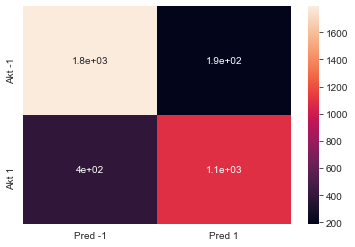

In [19]:
print(classification_report(y_test, y_base_LR_TV))
cm_LR_TV_test = confusion_matrix(y_test, y_base_LR_TV, labels = [1,0])
df_LR_TV_test = pd.DataFrame(data=cm_LR_TV_test, columns=['Pred -1', 'Pred 1'], index=['Akt -1', 'Akt 1'])
sns.heatmap(df_LR_TV_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### KNN (CountVectorizer)

In [20]:
pipe_KNN_CV = Pipeline([
    ("prep", CountVectorizer(ngram_range=(1,2))),
    ("algo", KNeighborsClassifier())
])

In [21]:
pipe_KNN_CV.fit(X_train, y_train)

Pipeline(steps=[('prep', CountVectorizer(ngram_range=(1, 2))),
                ('algo', KNeighborsClassifier())])

In [22]:
y_base_KNN_CV = pipe_KNN_CV.predict(X_test)

In [23]:
df_base_KNN_CV = Eva_Matrix1(pipe_KNN_CV, X_train, y_train, X_test, y_test, "Pipeline KNN CV")
df_base_KNN_CV

,Training Pipeline KNN CV,Test Pipeline KNN CV
Accuracy,0.814190,0.693772
Recall,0.887331,0.802020
Precision,0.806544,0.703277
F1,0.845011,0.845011


              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1488
           1       0.70      0.80      0.75      1980

    accuracy                           0.69      3468
   macro avg       0.69      0.68      0.68      3468
weighted avg       0.69      0.69      0.69      3468



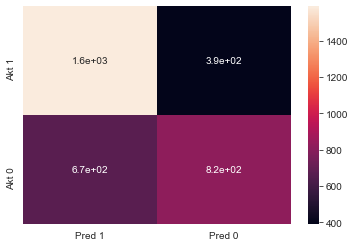

In [24]:
print(classification_report(y_test, y_base_KNN_CV))
cm_KNN_CV_test = confusion_matrix(y_test, y_base_KNN_CV, labels = [1,0])
df_KNN_CV_test = pd.DataFrame(data=cm_KNN_CV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_CV_test, annot=True)
plt.show()

### KNN (TfidfVectorizer)

In [25]:
pipe_KNN_TV = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", KNeighborsClassifier())
])

In [26]:
pipe_KNN_TV.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo', KNeighborsClassifier())])

In [27]:
y_base_KNN_TV = pipe_KNN_TV.predict(X_test)

In [28]:
df_base_KNN_TV = Eva_Matrix1(pipe_KNN_CV, X_train, y_train, X_test, y_test, "Pipeline KNN TV")
df_base_KNN_TV

,Training Pipeline KNN TV,Test Pipeline KNN TV
Accuracy,0.814190,0.693772
Recall,0.887331,0.802020
Precision,0.806544,0.703277
F1,0.845011,0.845011


              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1488
           1       0.81      0.73      0.77      1980

    accuracy                           0.75      3468
   macro avg       0.75      0.75      0.75      3468
weighted avg       0.76      0.75      0.75      3468



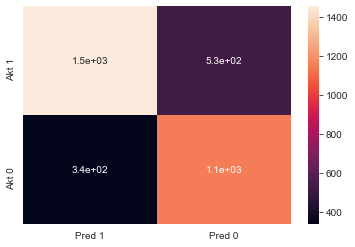

In [29]:
print(classification_report(y_test, y_base_KNN_TV))
cm_KNN_TV_test = confusion_matrix(y_test, y_base_KNN_TV, labels = [1,0])
df_KNN_TV_test = pd.DataFrame(data=cm_KNN_TV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_TV_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### DecisionTreeClassifier (CountVectorizer)

In [30]:
pipe_DT_CV = Pipeline([
    ("prep", CountVectorizer(ngram_range=(1,2))),
    ("algo", DecisionTreeClassifier())
])

In [31]:
pipe_DT_CV.fit(X_train, y_train)

Pipeline(steps=[('prep', CountVectorizer(ngram_range=(1, 2))),
                ('algo', DecisionTreeClassifier())])

In [32]:
y_base_DT_CV = pipe_DT_CV.predict(X_test)

In [33]:
df_base_DT_CV = Eva_Matrix1(pipe_DT_CV, X_train, y_train, X_test, y_test, "Pipeline DT CV")
df_base_DT_CV

,Training Pipeline DT CV,Test Pipeline DT CV
Accuracy,0.998918,0.711073
Recall,0.998484,0.652020
Precision,0.999621,0.804863
F1,0.999052,0.999052


              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1488
           1       0.80      0.65      0.72      1980

    accuracy                           0.71      3468
   macro avg       0.72      0.72      0.71      3468
weighted avg       0.73      0.71      0.71      3468



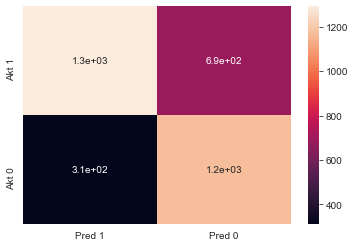

In [34]:
print(classification_report(y_test, y_base_DT_CV))
cm_DT_CV_test = confusion_matrix(y_test, y_base_DT_CV, labels = [1,0])
df_DT_CV_test = pd.DataFrame(data=cm_DT_CV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_CV_test, annot=True)
plt.show()

### DecisionTreeClassifier (TfidfVectorizer)

In [35]:
pipe_DT_TV = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", DecisionTreeClassifier())
])

In [36]:
pipe_DT_TV.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo', DecisionTreeClassifier())])

In [37]:
y_base_DT_TV = pipe_DT_TV.predict(X_test)

In [38]:
df_base_DT_TV = Eva_Matrix1(pipe_DT_CV, X_train, y_train, X_test, y_test, "Pipeline DT TV")
df_base_DT_TV

,Training Pipeline DT TV,Test Pipeline DT TV
Accuracy,0.998918,0.711073
Recall,0.998484,0.652020
Precision,0.999621,0.804863
F1,0.999052,0.999052


              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1488
           1       0.80      0.65      0.72      1980

    accuracy                           0.71      3468
   macro avg       0.72      0.72      0.71      3468
weighted avg       0.73      0.71      0.71      3468



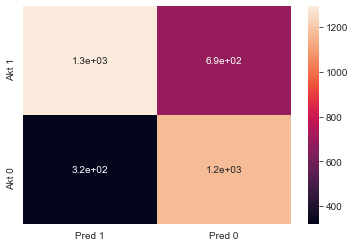

In [39]:
print(classification_report(y_test, y_base_DT_TV))
cm_DT_TV_test = confusion_matrix(y_test, y_base_DT_TV, labels = [1,0])
df_DT_TV_test = pd.DataFrame(data=cm_DT_TV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_TV_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### RandomForestClassifier (CountVectorizer)

In [40]:
pipe_RF_CV = Pipeline([
    ("prep", CountVectorizer(ngram_range=(1,2))),
    ("algo", RandomForestClassifier())
])

In [41]:
pipe_RF_CV.fit(X_train, y_train)

Pipeline(steps=[('prep', CountVectorizer(ngram_range=(1, 2))),
                ('algo', RandomForestClassifier())])

In [42]:
y_base_RF_CV = pipe_RF_CV.predict(X_test)

In [43]:
df_base_RF_CV = Eva_Matrix1(pipe_RF_CV, X_train, y_train, X_test, y_test, "Pipeline RF CV")
df_base_RF_CV

,Training Pipeline RF CV,Test Pipeline RF CV
Accuracy,0.998918,0.761246
Recall,0.998863,0.722727
Precision,0.999242,0.836842
F1,0.999052,0.999052


              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1488
           1       0.84      0.72      0.78      1980

    accuracy                           0.76      3468
   macro avg       0.76      0.77      0.76      3468
weighted avg       0.77      0.76      0.76      3468



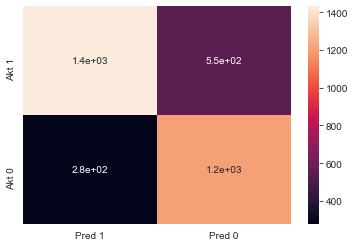

In [44]:
print(classification_report(y_test, y_base_RF_CV))
cm_RF_CV_test = confusion_matrix(y_test, y_base_RF_CV, labels = [1,0])
df_RF_CV_test = pd.DataFrame(data=cm_RF_CV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_CV_test, annot=True)
plt.show()

### RandomForestClassifier (TfidfVectorizer)

In [45]:
pipe_RF_TV = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", RandomForestClassifier())
])

In [46]:
pipe_RF_TV.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo', RandomForestClassifier())])

In [47]:
y_base_RF_TV = pipe_RF_TV.predict(X_test)

In [48]:
df_base_RF_TV = Eva_Matrix1(pipe_RF_CV, X_train, y_train, X_test, y_test, "Pipeline RF TV")
df_base_RF_TV

,Training Pipeline RF TV,Test Pipeline RF TV
Accuracy,0.998918,0.761246
Recall,0.998863,0.722727
Precision,0.999242,0.836842
F1,0.999052,0.999052


              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1488
           1       0.83      0.73      0.78      1980

    accuracy                           0.76      3468
   macro avg       0.76      0.77      0.76      3468
weighted avg       0.77      0.76      0.76      3468



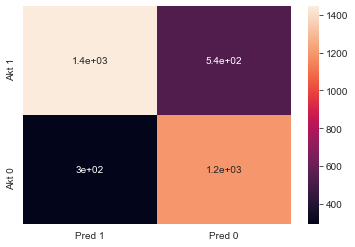

In [49]:
print(classification_report(y_test, y_base_RF_TV))
cm_RF_TV_test = confusion_matrix(y_test, y_base_RF_TV, labels = [1,0])
df_RF_TV_test = pd.DataFrame(data=cm_RF_TV_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_TV_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

## Hyper Parameter Tuning (CountVectorizer & TfidfVectorizer)

### Logistic Regression (CountVectorizer)

In [50]:
param_LR = {
    "algo__C" : np.logspace(-3, 3, 7),
    "algo__penalty" : ['l1', 'l2', 'elasticnet']
}

skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [51]:
LR_GS_CV = GridSearchCV(pipe_LR_CV, param_LR, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [52]:
LR_GS_CV.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   37.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [53]:
LR_HPT_CV = LR_GS_CV.best_estimator_

In [54]:
y_test_LR_HPT_CV = LR_HPT_CV.predict(X_test)

In [55]:
df_LR_CV_HPT = Eva_Matrix1(LR_HPT_CV, X_train, y_train, X_test, y_test, "Pipeline LR CV Hyper Parameter Tuning")
df_LR_CV_HPT

,Training Pipeline LR CV Hyper Parameter Tuning,Test Pipeline LR CV Hyper Parameter Tuning
Accuracy,0.621242,0.613033
Recall,0.988632,0.985354
Precision,0.602540,0.597733
F1,0.748744,0.748744


              precision    recall  f1-score   support

           0       0.86      0.12      0.21      1488
           1       0.60      0.99      0.74      1980

    accuracy                           0.61      3468
   macro avg       0.73      0.55      0.48      3468
weighted avg       0.71      0.61      0.51      3468



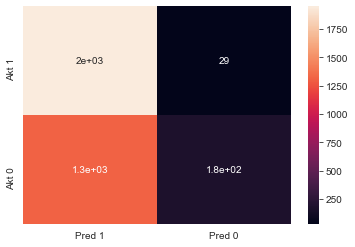

In [56]:
print(classification_report(y_test, y_test_LR_HPT_CV))
cm_LR_CV_test_HPT = confusion_matrix(y_test, y_test_LR_HPT_CV, labels = [1,0])
df_LR_CV_test_HPT = pd.DataFrame(data=cm_LR_CV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_CV_test_HPT, annot=True)
plt.show()

### Logistic Regression (TfidfVectorizer)

In [57]:
LR_GS_TV = GridSearchCV(pipe_LR_TV, param_LR, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [58]:
LR_GS_TV.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   39.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [59]:
LR_HPT_TV = LR_GS_TV.best_estimator_

In [60]:
y_test_LR_HPT_TV = LR_HPT_TV.predict(X_test)

In [61]:
df_LR_TV_HPT = Eva_Matrix1(LR_HPT_TV, X_train, y_train, X_test, y_test, "Pipeline LR TV Hyper Parameter Tuning")
df_LR_TV_HPT

,Training Pipeline LR TV Hyper Parameter Tuning,Test Pipeline LR TV Hyper Parameter Tuning
Accuracy,0.570841,0.570934
Recall,1.000000,1.000000
Precision,0.570841,0.570934
F1,0.726797,0.726797


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1488
           1       0.57      1.00      0.73      1980

    accuracy                           0.57      3468
   macro avg       0.29      0.50      0.36      3468
weighted avg       0.33      0.57      0.41      3468



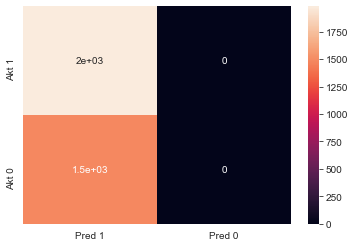

In [62]:
print(classification_report(y_test, y_test_LR_HPT_TV))
cm_LR_TV_test_HPT = confusion_matrix(y_test, y_test_LR_HPT_TV, labels = [1,0])
df_LR_TV_test_HPT = pd.DataFrame(data=cm_LR_TV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_TV_test_HPT, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### KNN (CountVectorizer)

In [63]:
param_KNN = {
    "algo__n_neighbors" : np.arange(1, 51, 2),
    "algo__p" : [1, 2],
    "algo__weights" : ['uniform', 'distance']
}

skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [64]:
KNN_GS_CV = GridSearchCV(pipe_KNN_CV, param_KNN, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [65]:
KNN_GS_CV.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [66]:
KNN_HPT_CV = KNN_GS_CV.best_estimator_

In [67]:
y_test_KNN_HPT_CV = KNN_HPT_CV.predict(X_test)

In [68]:
df_KNN_CV_HPT = Eva_Matrix1(KNN_HPT_CV, X_train, y_train, X_test, y_test, "Pipeline KNN CV Hyper Parameter Tuning")
df_KNN_CV_HPT

,Training Pipeline KNN CV Hyper Parameter Tuning,Test Pipeline KNN CV Hyper Parameter Tuning
Accuracy,0.582162,0.579585
Recall,0.997853,0.997475
Precision,0.577570,0.576138
F1,0.731651,0.731651


              precision    recall  f1-score   support

           0       0.88      0.02      0.05      1488
           1       0.58      1.00      0.73      1980

    accuracy                           0.58      3468
   macro avg       0.73      0.51      0.39      3468
weighted avg       0.70      0.58      0.44      3468



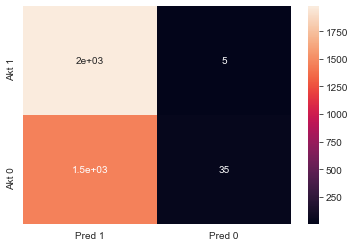

In [69]:
print(classification_report(y_test, y_test_KNN_HPT_CV))
cm_KNN_CV_test_HPT = confusion_matrix(y_test, y_test_KNN_HPT_CV, labels = [1,0])
df_KNN_CV_test_HPT = pd.DataFrame(data=cm_KNN_CV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_CV_test_HPT, annot=True)
plt.show()

### KNN (TfidfVectorizer)

In [72]:
KNN_GS_TV = GridSearchCV(pipe_KNN_TV, param_KNN, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [73]:
KNN_GS_TV.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [74]:
KNN_HPT_TV = KNN_GS_TV.best_estimator_

In [75]:
y_test_KNN_HPT_TV = KNN_HPT_TV.predict(X_test)

In [76]:
df_KNN_TV_HPT = Eva_Matrix1(KNN_HPT_TV, X_train, y_train, X_test, y_test, "Pipeline KNN TV Hyper Parameter Tuning")
df_KNN_TV_HPT

,Training Pipeline KNN TV Hyper Parameter Tuning,Test Pipeline KNN TV Hyper Parameter Tuning
Accuracy,0.584757,0.584775
Recall,0.993811,0.988889
Precision,0.579467,0.579976
F1,0.732077,0.732077


              precision    recall  f1-score   support

           0       0.76      0.05      0.09      1488
           1       0.58      0.99      0.73      1980

    accuracy                           0.58      3468
   macro avg       0.67      0.52      0.41      3468
weighted avg       0.66      0.58      0.46      3468



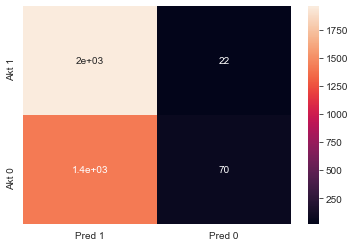

In [77]:
print(classification_report(y_test, y_test_KNN_HPT_TV))
cm_KNN_TV_test_HPT = confusion_matrix(y_test, y_test_KNN_HPT_TV, labels = [1,0])
df_KNN_TV_test_HPT = pd.DataFrame(data=cm_KNN_TV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_TV_test_HPT, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### DecisionTreeClasifier (CountVectorizer)

In [81]:
param_DT = {
    "algo__max_depth" : [None, 5, 10, 15],
    "algo__min_samples_leaf" : np.arange(1, 20, 5),
    "algo__max_features" : np.arange(0, 1.1, 0.3)
}

skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [82]:
DT_GS_CV = GridSearchCV(pipe_DT_CV, param_DT, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [83]:
DT_GS_CV.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 5, 10, 15],
                         'algo__max_features': array([0. , 0.3, 0.6, 0.9]),
                         'algo__min_samples_leaf': array([ 1,  6, 11, 16])},
             scoring='recall', verbose=1)

In [84]:
DT_HPT_CV = DT_GS_CV.best_estimator_

In [85]:
y_test_DT_HPT_CV = DT_HPT_CV.predict(X_test)

In [86]:
df_DT_CV_HPT = Eva_Matrix1(DT_HPT_CV, X_train, y_train, X_test, y_test, "Pipeline DT CV Hyper Parameter Tuning")
df_DT_CV_HPT

,Training Pipeline DT CV Hyper Parameter Tuning,Test Pipeline DT CV Hyper Parameter Tuning
Accuracy,0.617925,0.611303
Recall,0.989895,0.985859
Precision,0.600260,0.596577
F1,0.747342,0.747342


              precision    recall  f1-score   support

           0       0.86      0.11      0.20      1488
           1       0.60      0.99      0.74      1980

    accuracy                           0.61      3468
   macro avg       0.73      0.55      0.47      3468
weighted avg       0.71      0.61      0.51      3468



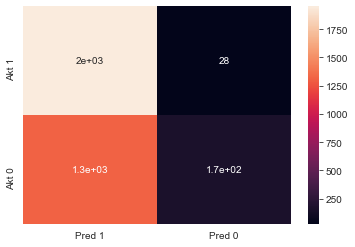

In [87]:
print(classification_report(y_test, y_test_DT_HPT_CV))
cm_DT_CV_test_HPT = confusion_matrix(y_test, y_test_DT_HPT_CV, labels = [1,0])
df_DT_CV_test_HPT = pd.DataFrame(data=cm_DT_CV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_CV_test_HPT, annot=True)
plt.show()

### DecisionTreeClasifier (TfidfVectorizer)

In [88]:
DT_GS_TV = GridSearchCV(pipe_DT_TV, param_DT, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [89]:
DT_GS_TV.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 5, 10, 15],
                         'algo__max_features': array([0. , 0.3, 0.6, 0.9]),
                         'algo__min_samples_leaf': array([ 1,  6, 11, 16])},
             scoring='recall', verbose=1)

In [90]:
DT_HPT_TV = DT_GS_TV.best_estimator_

In [91]:
y_test_DT_HPT_TV = DT_HPT_TV.predict(X_test)

In [92]:
df_DT_TV_HPT = Eva_Matrix1(DT_HPT_TV, X_train, y_train, X_test, y_test, "Pipeline DT TV Hyper Parameter Tuning")
df_DT_TV_HPT

,Training Pipeline DT TV Hyper Parameter Tuning,Test Pipeline DT TV Hyper Parameter Tuning
Accuracy,0.617636,0.610438
Recall,0.992800,0.990909
Precision,0.599725,0.595448
F1,0.747752,0.747752


              precision    recall  f1-score   support

           0       0.90      0.10      0.19      1488
           1       0.60      0.99      0.74      1980

    accuracy                           0.61      3468
   macro avg       0.75      0.55      0.47      3468
weighted avg       0.72      0.61      0.50      3468



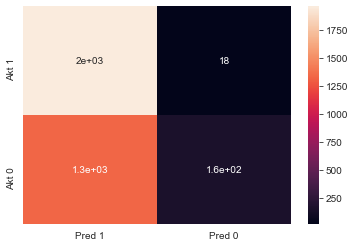

In [93]:
print(classification_report(y_test, y_test_DT_HPT_TV))
cm_DT_TV_test_HPT = confusion_matrix(y_test, y_test_DT_HPT_TV, labels = [1,0])
df_DT_TV_test_HPT = pd.DataFrame(data=cm_DT_TV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_TV_test_HPT, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### RandomForestClassifier (CountVectorizer)

In [94]:
param_RF = {
    "algo__n_estimators" : np.arange(100, 301, 100), 
    "algo__max_depth" : [None, 5, 10],
    "algo__min_samples_leaf" : np.arange(1, 12, 5), 
    "algo__max_features" : [0.3, 0.5, 0.7, 0.8] 
}

skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [95]:
RF_GS_CV = GridSearchCV(pipe_RF_CV, param_RF, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [96]:
RF_GS_CV.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 128.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 417.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 458.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 5, 10],
                         'algo__max_features': [0.3, 0.5, 0.7, 0.8],
                         'algo__min_samples_leaf': array([ 1,  6, 11]),
                         'algo__n_estimators': array([100, 200, 300])},
             scoring='recall', verbose=1)

In [97]:
RF_HPT_CV = RF_GS_CV.best_estimator_

In [98]:
y_test_RF_HPT_CV = RF_HPT_CV.predict(X_test)

In [99]:
df_RF_CV_HPT = Eva_Matrix1(RF_HPT_CV, X_train, y_train, X_test, y_test, "Pipeline RF CV Hyper Parameter Tuning")
df_RF_CV_HPT

,Training Pipeline RF CV Hyper Parameter Tuning,Test Pipeline RF CV Hyper Parameter Tuning
Accuracy,0.637104,0.630334
Recall,0.984211,0.981818
Precision,0.613543,0.609404
F1,0.755881,0.755881


              precision    recall  f1-score   support

           0       0.87      0.16      0.27      1488
           1       0.61      0.98      0.75      1980

    accuracy                           0.63      3468
   macro avg       0.74      0.57      0.51      3468
weighted avg       0.72      0.63      0.55      3468



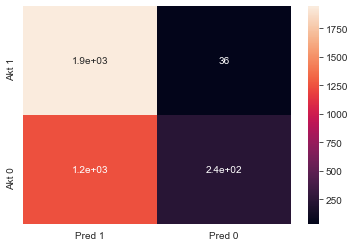

In [100]:
print(classification_report(y_test, y_test_RF_HPT_CV))
cm_RF_CV_test_HPT = confusion_matrix(y_test, y_test_RF_HPT_CV, labels = [1,0])
df_RF_CV_test_HPT = pd.DataFrame(data=cm_RF_CV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_CV_test_HPT, annot=True)
plt.show()

### RandomForestClassifier (TfidfVectorizer)

In [101]:
RF_GS_TV = GridSearchCV(pipe_RF_TV, param_RF, cv = skf, scoring = 'recall', n_jobs = -1, verbose = 1)

In [102]:
RF_GS_TV.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 118.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 371.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 413.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 5, 10],
                         'algo__max_features': [0.3, 0.5, 0.7, 0.8],
                         'algo__min_samples_leaf': array([ 1,  6, 11]),
                         'algo__n_estimators': array([100, 200, 300])},
             scoring='recall', verbose=1)

In [103]:
RF_HPT_TV = RF_GS_TV.best_estimator_

In [104]:
y_test_RF_HPT_TV = RF_HPT_TV.predict(X_test)

In [105]:
df_RF_TV_HPT = Eva_Matrix1(RF_HPT_TV, X_train, y_train, X_test, y_test, "Pipeline RF TV Hyper Parameter Tuning")
df_RF_TV_HPT

,Training Pipeline RF TV Hyper Parameter Tuning,Test Pipeline RF TV Hyper Parameter Tuning
Accuracy,0.638042,0.630911
Recall,0.985348,0.983333
Precision,0.614010,0.609580
F1,0.756571,0.756571


              precision    recall  f1-score   support

           0       0.88      0.16      0.27      1488
           1       0.61      0.98      0.75      1980

    accuracy                           0.63      3468
   macro avg       0.74      0.57      0.51      3468
weighted avg       0.73      0.63      0.55      3468



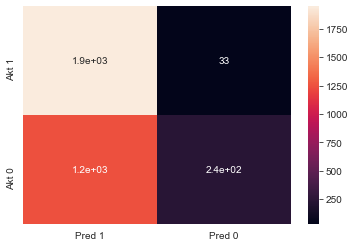

In [106]:
print(classification_report(y_test, y_test_RF_HPT_TV))
cm_RF_TV_test_HPT = confusion_matrix(y_test, y_test_RF_HPT_TV, labels = [1,0])
df_RF_TV_test_HPT = pd.DataFrame(data=cm_RF_TV_test_HPT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_TV_test_HPT, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

## Fine Tuning

### RandomForestClassifier TfidfVectorizer (Fine Tuning)

In [334]:
pipeRF_Tuning = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", RandomForestClassifier(n_estimators = 201, max_depth = 21, max_features = 0.1, min_samples_leaf = 4, min_samples_split = 8, random_state=42))
])

In [335]:
pipeRF_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo',
                 RandomForestClassifier(max_depth=21, max_features=0.1,
                                        min_samples_leaf=4, min_samples_split=8,
                                        n_estimators=201, random_state=42))])

In [336]:
y_test_RF_Fine_Tuned = pipeRF_Tuning.predict(X_test)

In [337]:
df_RF_Fine_Tuned = Eva_Matrix1(pipeRF_Tuning, X_train, y_train, X_test, y_test, "Pipeline RF Fine Tuning")
df_RF_Fine_Tuned

,Training Pipeline RF Fine Tuning,Test Pipeline RF Fine Tuning
Accuracy,0.733290,0.722030
Recall,0.957054,0.947475
Precision,0.692849,0.685673
F1,0.803798,0.803798


              precision    recall  f1-score   support

           0       0.86      0.42      0.57      1488
           1       0.69      0.95      0.80      1980

    accuracy                           0.72      3468
   macro avg       0.77      0.68      0.68      3468
weighted avg       0.76      0.72      0.70      3468



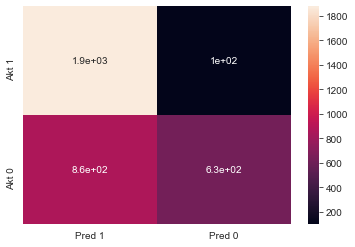

In [338]:
print(classification_report(y_test, y_test_RF_Fine_Tuned))
cm_RF_Fine_tuned_test = confusion_matrix(y_test, y_test_RF_Fine_Tuned, labels = [1,0])
df_RF_Fine_tuned_test = pd.DataFrame(data=cm_RF_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_Fine_tuned_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

### KNN TfidfVectorizer (Fine Tuning)

In [289]:
pipeKNN_Tuning = Pipeline([
    ("prep", TfidfVectorizer(ngram_range=(1,2))),
    ("algo", KNeighborsClassifier(n_neighbors = 26, p = 1, weights = 'uniform'))
])

In [290]:
pipeKNN_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep', TfidfVectorizer(ngram_range=(1, 2))),
                ('algo', KNeighborsClassifier(n_neighbors=26, p=1))])

In [291]:
y_test_KNN_Fine_Tuned = pipeKNN_Tuning.predict(X_test)

In [292]:
df_KNN_Fine_Tuned = Eva_Matrix1(pipeKNN_Tuning, X_train, y_train, X_test, y_test, "Pipeline KNN Fine Tuning")
df_KNN_Fine_Tuned

,Training Pipeline KNN Fine Tuning,Test Pipeline KNN Fine Tuning
Accuracy,0.647992,0.622549
Recall,0.958318,0.937879
Precision,0.625010,0.610253
F1,0.756582,0.756582


              precision    recall  f1-score   support

           0       0.71      0.20      0.32      1488
           1       0.61      0.94      0.74      1980

    accuracy                           0.62      3468
   macro avg       0.66      0.57      0.53      3468
weighted avg       0.65      0.62      0.56      3468



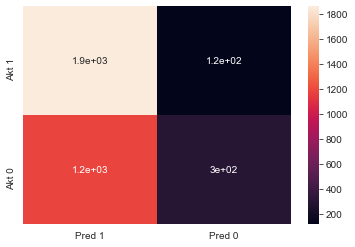

In [293]:
print(classification_report(y_test, y_test_KNN_Fine_Tuned))
cm_KNN_Fine_tuned_test = confusion_matrix(y_test, y_test_KNN_Fine_Tuned, labels = [1,0])
df_KNN_Fine_tuned_test = pd.DataFrame(data=cm_KNN_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_Fine_tuned_test, annot=True)
plt.show()

### ---------------------------------------------------------------------------------------------------------

## Joblib Model Pipeline Fine Tuning RandomForestClassifier

In [339]:
import joblib

In [340]:
joblib.dump(pipeRF_Tuning, 'Model_RF_Sentiment_Analysis')

['Model_RF_Sentiment_Analysis']

### ---------------------------------------------------------------------------------------------------------

## Conclusion Model

### Base Model

In [357]:
base_model = pd.concat([df_base_LR_CV, df_base_LR_TV, 
           df_base_KNN_CV, df_base_KNN_TV,
           df_base_DT_CV, df_base_DT_TV,
           df_base_RF_CV, df_base_RF_TV], axis=1, join="inner").T
base_model

,Accuracy,Recall,Precision,F1
Training Pipeline LR CV,0.960704,0.996842,0.938184,0.966624
Test Pipeline LR CV,0.832757,0.906566,0.819635,0.966624
Training Pipeline LR TV,0.960704,0.996842,0.938184,0.966624
Test Pipeline LR TV,0.832757,0.906566,0.819635,0.966624
Training Pipeline KNN CV,0.814190,0.887331,0.806544,0.845011
Test Pipeline KNN CV,0.693772,0.802020,0.703277,0.845011
Training Pipeline KNN TV,0.814190,0.887331,0.806544,0.845011
Test Pipeline KNN TV,0.693772,0.802020,0.703277,0.845011
Training Pipeline DT CV,0.998918,0.998484,0.999621,0.999052
Test Pipeline DT CV,0.711073,0.652020,0.804863,0.999052


From table above, for all base model seems overfitting at Recall even for CountVectorizer and TfidfVectorizer. So i decided to do hyper parameter tuning for the model.

### Hyper Parameter Tuning Model

In [358]:
hyper_parameter_model = pd.concat([df_LR_CV_HPT, df_LR_TV_HPT, 
           df_KNN_CV_HPT, df_KNN_TV_HPT,
           df_DT_CV_HPT, df_DT_TV_HPT,
           df_RF_CV_HPT, df_RF_TV_HPT], axis=1, join="inner").T
hyper_parameter_model

,Accuracy,Recall,Precision,F1
Training Pipeline LR CV Hyper Parameter Tuning,0.621242,0.988632,0.602540,0.748744
Test Pipeline LR CV Hyper Parameter Tuning,0.613033,0.985354,0.597733,0.748744
Training Pipeline LR TV Hyper Parameter Tuning,0.570841,1.000000,0.570841,0.726797
Test Pipeline LR TV Hyper Parameter Tuning,0.570934,1.000000,0.570934,0.726797
Training Pipeline KNN CV Hyper Parameter Tuning,0.582162,0.997853,0.577570,0.731651
Test Pipeline KNN CV Hyper Parameter Tuning,0.579585,0.997475,0.576138,0.731651
Training Pipeline KNN TV Hyper Parameter Tuning,0.584757,0.993811,0.579467,0.732077
Test Pipeline KNN TV Hyper Parameter Tuning,0.584775,0.988889,0.579976,0.732077
Training Pipeline DT CV Hyper Parameter Tuning,0.617925,0.989895,0.600260,0.747342
Test Pipeline DT CV Hyper Parameter Tuning,0.611303,0.985859,0.596577,0.747342


After i do hyper parameter tuning for the model, the model seems really too perfect because the score of Recall is almost 1 however the Accuracy Score of all model is around at Coin Toss Learner, so i do some Fine Tuning at RandomForestClassifier TfidfVectorizer and KNN TfidfVectorizer to get a better model.

### Fine Tuning

In [359]:
fine_tuning_model = pd.concat([df_RF_Fine_Tuned, df_KNN_Fine_Tuned], axis=1, join="inner").T
fine_tuning_model

,Accuracy,Recall,Precision,F1
Training Pipeline RF Fine Tuning,0.733290,0.957054,0.692849,0.803798
Test Pipeline RF Fine Tuning,0.722030,0.947475,0.685673,0.803798
Training Pipeline KNN Fine Tuning,0.647992,0.958318,0.625010,0.756582
Test Pipeline KNN Fine Tuning,0.622549,0.937879,0.610253,0.756582


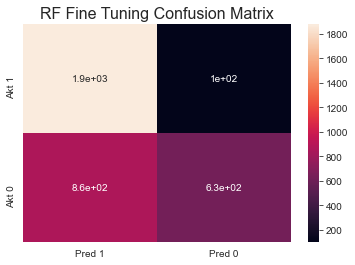

In [365]:
sns.heatmap(df_RF_Fine_tuned_test, annot=True)
plt.title('RF Fine Tuning Confusion Matrix', size=16)
plt.show()

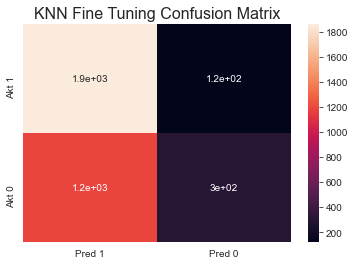

In [366]:
sns.heatmap(df_KNN_Fine_tuned_test, annot=True)
plt.title('KNN Fine Tuning Confusion Matrix', size=16)
plt.show()

After i do some Fine Tuning, finally i found a better model for predicting which is a RandomForestClassifier with fine tuning as follows the parameters n_estimators = 201, max_depth = 21, max_features = 0.1, min_samples_leaf = 4, min_samples_split = 8, random_state=42 with the Recall score is 0.95 for data train, and 0.94 for data test. Comparing with the KNN fine tuning, the RandomForestClassifier is better at Accuracy Score and the Confusion Matrix, and we can see the False Negative (Actual 1, Prediction 0) & False Positive (Actual 0, Prediction 1) is lower at RandomForestClassifier Fine Tuning Model, and the model can appropriately to predict correctly.